In [30]:
import torch
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from torch import optim

In [5]:
X,y = fetch_california_housing(return_X_y = True , as_frame = True)

In [6]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [7]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [22]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [26]:
y_test

tensor([0.4770, 0.4580, 5.0000,  ..., 1.1770, 2.6310, 4.8150])

## Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
X_train_tensor = torch.tensor(X_train_scaled,  dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled,  dtype=torch.float32)

y_train = torch.tensor(y_train, dtype = torch.float32)
y_test = torch.tensor(y_test, dtype = torch.float32)

C:\Users\ramya\AppData\Local\Temp\ipykernel_14548\2210020415.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype = torch.float32)
C:\Users\ramya\AppData\Local\Temp\ipykernel_14548\2210020415.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype = torch.float32)


In [27]:
from torch import nn

In [28]:
class SimpleNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size):
        super(SimpleNeuralNetwork, self).__init__()
        self.network = nn.Sequential(nn.Linear(input_size, hidden_layer_size), 
                                     nn.Linear(hidden_layer_size, output_size))
    def forward(self, x):
        return self.network(x)

In [42]:
my_nn = SimpleNeuralNetwork(8, 10, 1)

In [47]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(my_nn.parameters(), lr=0.001)

# Training the model
epochs = 500
for epoch in range(epochs):
    my_nn.train()  # Set the model to training mode

    # Forward pass
    outputs = my_nn(X_train_tensor)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 25 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

C:\Users\ramya\anaconda3\lib\site-packages\torch\nn\modules\loss.py:538: UserWarning: Using a target size (torch.Size([15480])) that is different to the input size (torch.Size([15480, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [25/500], Loss: 1.3343
Epoch [50/500], Loss: 1.3343
Epoch [75/500], Loss: 1.3343
Epoch [100/500], Loss: 1.3343
Epoch [125/500], Loss: 1.3343
Epoch [150/500], Loss: 1.3343
Epoch [175/500], Loss: 1.3343
Epoch [200/500], Loss: 1.3343
Epoch [225/500], Loss: 1.3343
Epoch [250/500], Loss: 1.3343
Epoch [275/500], Loss: 1.3343
Epoch [300/500], Loss: 1.3343
Epoch [325/500], Loss: 1.3343
Epoch [350/500], Loss: 1.3343
Epoch [375/500], Loss: 1.3343
Epoch [400/500], Loss: 1.3343
Epoch [425/500], Loss: 1.3343
Epoch [450/500], Loss: 1.3343
Epoch [475/500], Loss: 1.3343
Epoch [500/500], Loss: 1.3343


Test Loss: 1.3233


C:\Users\ramya\anaconda3\lib\site-packages\torch\nn\modules\loss.py:538: UserWarning: Using a target size (torch.Size([5160])) that is different to the input size (torch.Size([5160, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


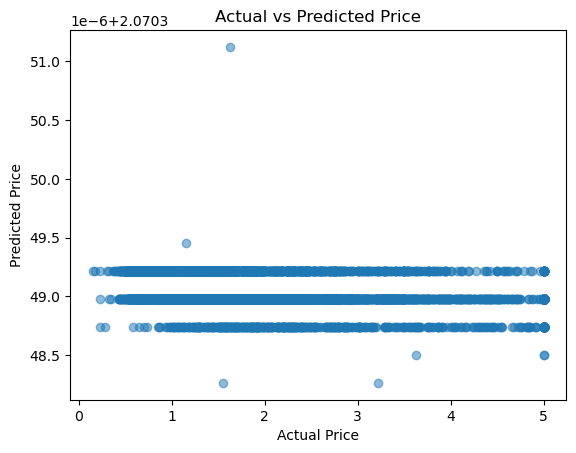

In [48]:
my_nn.eval()  # This sets the model to evaluation mode
with torch.no_grad():
    predictions = my_nn(X_test_tensor)
    test_loss = criterion(predictions, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

# Plotting our results
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions.numpy(), alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

In [49]:
from sklearn.metrics import r2_score

# Evaluate the model
#model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = my_nn(X_test_tensor).numpy()
    actuals = y_test.numpy()

r2 = r2_score(actuals, predictions)
print(f'R2 score: {r2:.4f}')

R2 score: -0.0000


# Lab

In [ ]:
# https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis_clean.csv

In [ ]:
# claim amount using linear regression and NN( neurons number is between average between input and output, and arounnd )

In [ ]:
# scaling num and encoding categorical